#IMPORTING LIBRARIES

In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

#SPLITTING DATA

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[10]

3

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

#HANDLING CATEGORICAL DATA

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#FITTING OF DATA

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 156us/step - loss: 2.5659 - accuracy: 0.5153 - val_loss: 1.6991 - val_accuracy: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 118us/step - loss: 1.3752 - accuracy: 0.7114 - val_loss: 1.2632 - val_accuracy: 0.7340
Epoch 3/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.0112 - accuracy: 0.7868 - val_loss: 1.1031 - val_accuracy: 0.7700
Epoch 4/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.7946 - accuracy: 0.8334 - val_loss: 1.0113 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.6347 - accuracy: 0.8697 - val_loss: 0.9640 - val_accuracy: 0.7890
Epoch 6/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.5095 - accuracy: 0.8958 - val_loss: 0.9213 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 119us/step - loss

#GRAPHS

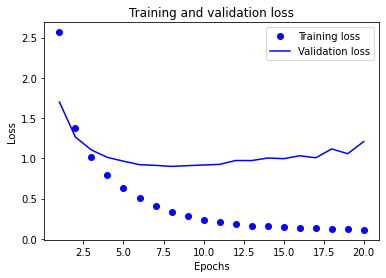

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

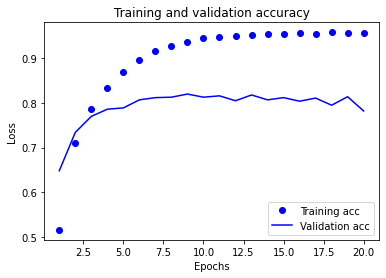

In [ ]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 125us/step - loss: 2.4794 - accuracy: 0.5596 - val_loss: 1.6664 - val_accuracy: 0.6520
Epoch 2/8
7982/7982 [==============================] - 1s 119us/step - loss: 1.3810 - accuracy: 0.7056 - val_loss: 1.2870 - val_accuracy: 0.7190
Epoch 3/8
7982/7982 [==============================] - 1s 118us/step - loss: 1.0511 - accuracy: 0.7681 - val_loss: 1.1193 - val_accuracy: 0.7570
Epoch 4/8
7982/7982 [==============================] - 1s 120us/step - loss: 0.8399 - accuracy: 0.8120 - val_loss: 1.0203 - val_accuracy: 0.7850
Epoch 5/8
7982/7982 [==============================] - 1s 120us/step - loss: 0.6738 - accuracy: 0.8530 - val_loss: 0.9863 - val_accuracy: 0.7820
Epoch 6/8
7982/7982 [==============================] - 1s 119us/step - loss: 0.5466 - accuracy: 0.8835 - val_loss: 0.9409 - val_accuracy: 0.8030
Epoch 7/8
7982/7982 [==============================] - 1s 119us/step - loss: 0.439

In [ ]:
results

[0.9689486188115759, 0.7853962779045105]

In [ ]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19857524487978628

#PREDICTIONS

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

#ACCURACY

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 172us/step - loss: 2.5884 - accuracy: 0.3584 - val_loss: 1.9216 - val_accuracy: 0.4270
Epoch 2/20
7982/7982 [==============================] - 1s 158us/step - loss: 1.6064 - accuracy: 0.5783 - val_loss: 1.5068 - val_accuracy: 0.6090
Epoch 3/20
7982/7982 [==============================] - 1s 165us/step - loss: 1.2795 - accuracy: 0.6691 - val_loss: 1.3557 - val_accuracy: 0.6550
Epoch 4/20
7982/7982 [==============================] - 1s 167us/step - loss: 1.1247 - accuracy: 0.6924 - val_loss: 1.3011 - val_accuracy: 0.6700
Epoch 5/20
7982/7982 [==============================] - 1s 163us/step - loss: 1.0162 - accuracy: 0.7201 - val_loss: 1.2991 - val_accuracy: 0.6880
Epoch 6/20
7982/7982 [==============================] - 1s 162us/step - loss: 0.9253 - accuracy: 0.7571 - val_loss: 1.2686 - val_accuracy: 0.7030
Epoch 7/20
7982/7982 [==============================] - 1s 166us/step - loss